<a href="https://drive.google.com/open?id=1TbhkRjmXsETf1DOHNHR4iyVRFJZMkzDy">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Multivariate Linear Regression

Regression is a method by which we find a relationship of one or several variable with a outcome variable whose value is of our interest. The notebook named `Linear Regression with Single Variable` demonstrates the use of regression to establish relationship between single predictor varibale and outcome variable.


**Multivariate Regression** is a method used to measure the degree at which more than one independent variable (predictors) and more than one dependent variable (responses), are linearly related. In this notbook, we will apply regression to establish relationship between multiple predictor variables and the outcome variable. Let's get Started!

## Import Necessary Libraries
- **numpy** : NumPy is the fundamental package for scientific computing with Python. For all major mathematical computations we afre going to use numpy 


- **matplotlib** :  Matplotlib is a Python 2D plotting library. We are going to use this every now and then to visually plot our data


- **pandas** : Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 


- **sklearn** : The Swiss-knife of Machine Learning, this library contains all the machine learning models preimplemented for anyone to use.


- **helpers** : Custom python file including functions for Mean squared error and Gradient decent

In [1]:
# Mathematic Computation
import numpy as np
# Plotting
import matplotlib
import matplotlib.pyplot as plt
# Data Analysis
import pandas as pd
# Swiss knife, for dataset and spliting
from sklearn import datasets
from sklearn.model_selection import KFold
# Custom Library
import helpers
from helpers import mean_squared_error, gredient_decent

# For Reproducibility and beautiful plots
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn-whitegrid')
np.random.seed(101)

In Linear regression with one variable, the equation we wanted to fit to our data looked like,


$$
\hat{y} = w_0 . 1 + w_1 . x
$$


where, $w_0$ and $w_1$ were model weights. Since we had only one predictor variable we only had 2 weight values, one for bias and other for predictor variable, but now in multivariate linear regression we need to slightly change tha above equation to include more than one predictor variable. This is done as follows.
<br><br>
$$
\hat{y} = w_0 . 1 + w_1 x_1 + w_2 x_2 + w_3 x_3 + . . . + w_j x_j
$$


here,
- $x_j$ : Predictor variable $j$, for $j \ge 1$
- $w_j$ : model weight $n$, for $j \ge 0$


To find the optimal values of weights, we use Gradient Decent optimization as before. The function to optimize error are defined in file named `helpers`.

To update weights, we need to find the gradient of cost function with respect to to each weight variable. This is done by slight modification of update rule discussed 
$$
\frac {\partial J}{\partial w_j} = \frac {2} {n} . \sum_{i=1}^n. (\hat{y}_i - y_i) . x_j
$$
where,
- $\hat{y_i}$ : Predictions for $i^{th}$ example
- $W_j$ : $j^{th}$ Model Parameter for $j \ge 0$
- $X_j$ : $j^{th}$ Feature in Input Data Points (Predictor Variables) for $j \ge 0$

The update rule for weights will be,
$$
w_j = w_j - \alpha . \frac {\partial J}{\partial w_j}
$$

**Ok enough theory, let's get coding**
## Let's buy a House
In the notebook `Linear Regression with Single Variable`, we used Regression to increase profit for our Food Truck buisness. Now because of that, you gained a lot of profit and now you wish to buy a house. You decided to buy a house in Boston and since using ML gained you soo much profit, you wish to utilize its power again to help you select ideal house. Unfortunately, house prices do not depend on single variable.

Prices depend on number of factors like population of area, crime rate, property taxes etc. To get a good estimate of house price, you collected data from different sources so that you can utilize the power of ML.

## Loading Dataset
Let's load the data and see some of the entries of the dataset.

**NOTE**: The dataset is available in sklearn library itself. Sources are mentioned in References.

In [2]:
x = datasets.load_boston()

df_boston = pd.DataFrame(x.data,columns=x.feature_names)
df_boston['target'] = pd.Series(x.target)

df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

The dataset have 13 predictor variable and one outcome variable. These are as follows
- **CRIM**     : per capita crime rate by town
- **ZN**       : proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**    : proportion of non-retail business acres per town
- **CHAS**     : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**      : nitric oxides concentration (parts per 10 million)
- **RM**       : average number of rooms per dwelling
- **AGE**      : proportion of owner-occupied units built prior to 1940
- **DIS**      : weighted distances to five Boston employment centres
- **RAD**      : index of accessibility to radial highways
- **TAX**      : full-value property-tax rate per $10,000
- **PTRATIO**  : pupil-teacher ratio by town
- **B**        : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**    : % lower status of the population
- **MEDV**     : Median value of owner-occupied homes in \$1000's
- **target**   : Price of house in \$1000

Our objective to predict the target variable from the given data.

## Train/Test and Cross-validation
In ML, we split our dataset into Training and Testing set. Then we train our model on the Training set and then test it on Testing set. By doing so, we make sure that our model is actually learning and is not just memorizing the data points in the training set.

We can create training and testing set in many ways, a popular method in the community is to use `K Fold Cross Validation`. The idea here is, divide the dataset in $k$ different subsets, then train a model on $(k-1)$ subsets and test the model on $k^{th}$ subset.

With `K Fold` we can try $k$ different models and each of the data point in our dataset gets a chance to be in the testing set. The sklearn library have a handy function made for us to make KFolds as shown below.

**NOTE**: As size of dataset is small, I have made 6 splits to make the train set larger, In practice, the datasets contain more than 10000 instances.

In [3]:
kfold = KFold(n_splits=6, shuffle=True, random_state=73)

train_test_dict = {}

for i, (train, test) in enumerate(kfold.split(df_boston)):
    if i == 3:
        break
    train_test_dict[i] = {'split_{}'.format(i) : (train, test)}

## Feature Selection
As we observed, we have 13 predictor variables but how many of them are actually useful for our model to learn the relationship. Consider for example, we had a feature which represent the how many people in the region like Pinapple pizza. This feature has nothing to do with the intended task, so we can safely remove the feature column. Similarly, some features are of more use than others.

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In Regression tasks, we can use **correlation** to establish how much a variable depend on our target value and use them for Feature Selection. But before using these correlation methods, let's first take all the features and see how our model performs.

## Let's just Use Everything
We are first going to use every feature that is present in our dataset to use for our regression task.

### Loading Data
Loading **training set** in variables and initialize weights and hyper-parameters. As always, you are welcome to play with them.

In [4]:
# training set
train_split_0 = df_boston.iloc[train_test_dict[0]['split_0'][0], :]
# predictor variables 
select_x = train_split_0.iloc[:, :-1]
# final variables for data
x_values = np.ones((len(select_x), select_x.shape[1] + 1))
x_values[:, 1:] = select_x.values
y_values = train_split_0.iloc[:, -1].values
y_values = y_values.reshape(-1, 1)

# Initializing weights to random values
weights_1 = np.random.rand(select_x.shape[1] + 1, 1)

# Initialize Hyper parameters
learning_rate = 6e-06
epoch = 10000

### Training
Let's start **training**

In [5]:
# Book keeping of loss
cost = []

# Running Gredient Decent
for i in range(1, epoch+1):
    pred = np.matmul(x_values, weights_1) #<- Generate Prediction
    c = mean_squared_error(y_values, pred) #<- Calculate Error
    cost.append(c)
    weights_1 = gredient_decent(weights_1, x_values, y_values, pred, learning_rate) #<- Update weights

### Visualizing results
Now, our model has trained, Let's see whether or not our cost function reduced with iterations

#### Cost Function

Text(0.5, 0, 'Iterations')

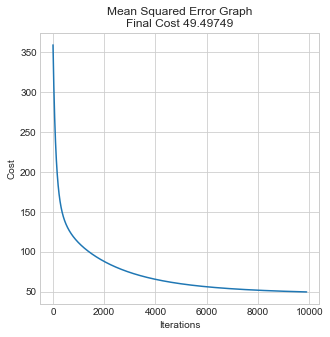

In [6]:
fig = plt.figure(figsize=(5, 5))
plt.plot(list(range(len(cost) - 100)), cost[100:])
plt.title("Mean Squared Error Graph\nFinal Cost {:.5f}".format(cost[-1]))
plt.ylabel("Cost")
plt.xlabel("Iterations")

#### Regression Line
As we can see, our cost function is reducing along the iterations, Let's plot the Regression line but this time its not as easy as it was when we were using Single variable.

You see as the number of variables increase, the visual representation also increase in dimensions. So, with one predictor variable, we had a 2D result, a regression line, with 2 predictor variables the line becomes a plane in 3D, with 3 predictor variable we go 4 dimensions and so on.

We are going to use a simple trick to see how our model behave for each predictor variable. For each variable we are going to keep other variables to their mean value and only change the value of variable in question. This is done in the following section and you can observe the result in the plots.

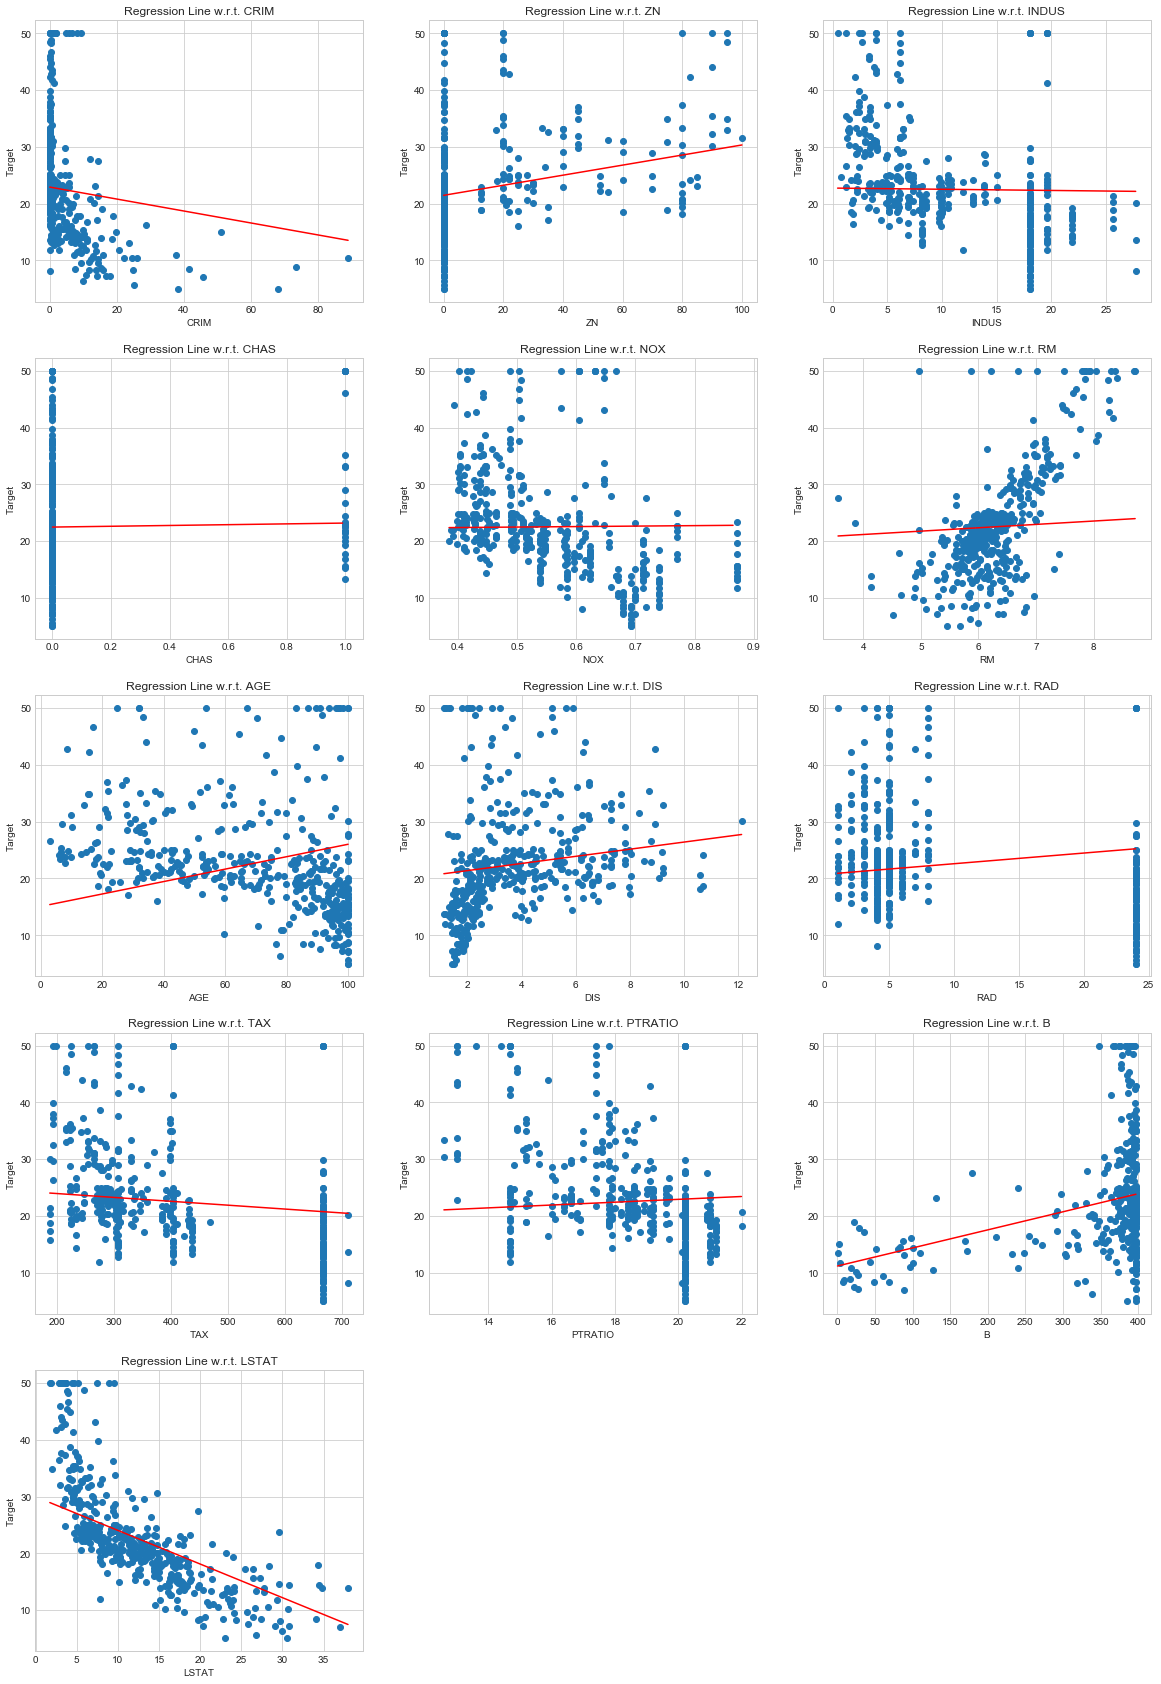

In [7]:
mean_values = np.array(select_x.mean(axis = 0))
mean_values = np.insert(mean_values, 0, 1)
fig = plt.figure(figsize = (20, 30))

for i in range(1, x_values.shape[1]):
    m = max(x_values[:, i])
    n = min(x_values[:, i])

    feature_values_for_plot = np.arange(n, m, 0.01)

    plot_x = np.ones((len(feature_values_for_plot), x_values.shape[1]))
    plot_x = np.multiply(plot_x, mean_values)

    plot_x[:, i] = feature_values_for_plot
    
    p = np.matmul(plot_x, weights_1)

    plt.subplot(5, 3, i)
    plt.scatter(x_values[:, i], y_values)
    plt.plot(plot_x[:, i], p, c = 'r')
    plt.title("Regression Line w.r.t. {}".format(x.feature_names[i - 1]))
    plt.ylabel("Target")
    plt.xlabel("{}".format(x.feature_names[i - 1]))

### Testing
Now, let's see how our model performs on data points it haven't seen during traning. We are going to access the model performance based on Mean Squared error, a lower error means our model is performing good.

In [8]:
test_split_0 = df_boston.iloc[train_test_dict[0]['split_0'][1], :]

select_test_x = test_split_0.iloc[:, :-1]

x_test_values = np.ones((len(select_test_x), select_test_x.shape[1] + 1))
x_test_values[:, 1:] = select_test_x.values
y_test_values = test_split_0.iloc[:, -1].values
y_test_values = y_test_values.reshape(-1, 1)

pred = np.matmul(x_test_values, weights_1)

m1 = mean_squared_error(y_test_values, pred)
print("MSE on Test Set: {:.5f}".format(m1))

MSE on Test Set: 31.18525


## Using feature Selection
Now that we have a base model. Now we are going to use Feature selection methods to reduce the number of input features. When we reduce the number of features we are actually throwing away information from our dataset that we think is not useful for our model. We will use correlation to select which feature are more relevant to our target variable and use those only.

**Correlation** is a statistical technique that can show whether and how strongly pairs of variables are related. The main result of a correlation is called the **correlation coefficient (or "r")**. It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

The first method we are going to use is called **Pearson r correlation**, it is most widely used correlation statistic to measure the degree of the relationship between linearly related variables. The formula for calculating Pearson correlation is as follows


$$
r_{xy} = \frac {n \sum x_i y_i - \sum x_i \sum y_i } {\sqrt {n \sum {x_i}^2 - {(\sum x_i)}^2} \sqrt {n \sum {y_i}^2 - {(\sum y_i)}^2}
}
$$

where,
- $r_{xy}$ : Pearson $r$ correlation coefficient between $x$ and $y$
- $n$ : number of observations
- $x_i$ : value of $x$ (for ith observation)
- $y_i$ : value of $y$ (for ith observation)

Let's use Pearson Correlation for Feature Selection.

## Will Pearson Correlation help?
We don't have to manually define the function for calculating correlation. The *pandas* dataframe have the `corr()` function which will calculate the `Pearson` coreelation for us with just one line. The below cell plots the Pearson correlation for each variable with the target variable in form of a bar chart.

In [9]:
fig = plt.figure(figsize=(10, 5))
col_names = df_boston.corr().iloc[-1, :-1].index
values = df_boston.corr().iloc[-1, :-1].values
plt.bar(col_names, values, width=0.5)

<BarContainer object of 13 artists>

### Selecting Features
Now, we are going to select those features which have an absolute value of correlation greater than 0.35.

In [10]:
corr = df_boston.corr().target.values

selected_feature_index = np.where(np.abs(corr) > 0.35)[0]
selected_features = df_boston.iloc[:, selected_feature_index]

selected_features.head()

CRIM    ZN  INDUS    NOX     RM   AGE  RAD    TAX  PTRATIO  LSTAT  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  1.0  296.0     15.3   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  2.0  242.0     17.8   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  2.0  242.0     17.8   4.03   
3  0.03237   0.0   2.18  0.458  6.998  45.8  3.0  222.0     18.7   2.94   
4  0.06905   0.0   2.18  0.458  7.147  54.2  3.0  222.0     18.7   5.33   

   target  
0    24.0  
1    21.6  
2    34.7  
3    33.4  
4    36.2

### Load Data in variables
Now that we have our selected features, let's load them up and get to training.

In [11]:
train_split_1 = selected_features.iloc[train_test_dict[1]['split_1'][0], :]

select_x = train_split_1.iloc[:, :-1]

x_values = np.ones((len(select_x), select_x.shape[1] + 1))
x_values[:, 1:] = select_x.values

y_values = train_split_1.iloc[:, -1].values
y_values = y_values.reshape(-1, 1)

# Initializing weights to random values
weights_2 = np.random.rand(select_x.shape[1] + 1, 1)

# Initialize Hyper parameters
learning_rate = 8e-06
epoch = 10000

### Training

In [12]:
cost = []

# Running Gredient Decent
for i in range(1, epoch+1):
    pred = np.matmul(x_values, weights_2) #<- Generate Prediction
    c = mean_squared_error(y_values, pred) #<- Calculate Error
    cost.append(c)
    weights_2 = gredient_decent(weights_2, x_values, y_values, pred, learning_rate) #<- Update weights

### Visualizing results
Let's visualize the results as before.

#### Cost Function

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.plot(list(range(len(cost) - 100)), cost[100:])
plt.title("Mean Squared Error Graph\nFinal Cost {:.5f}".format(cost[-1]))
plt.ylabel("Cost")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

#### Regression Line

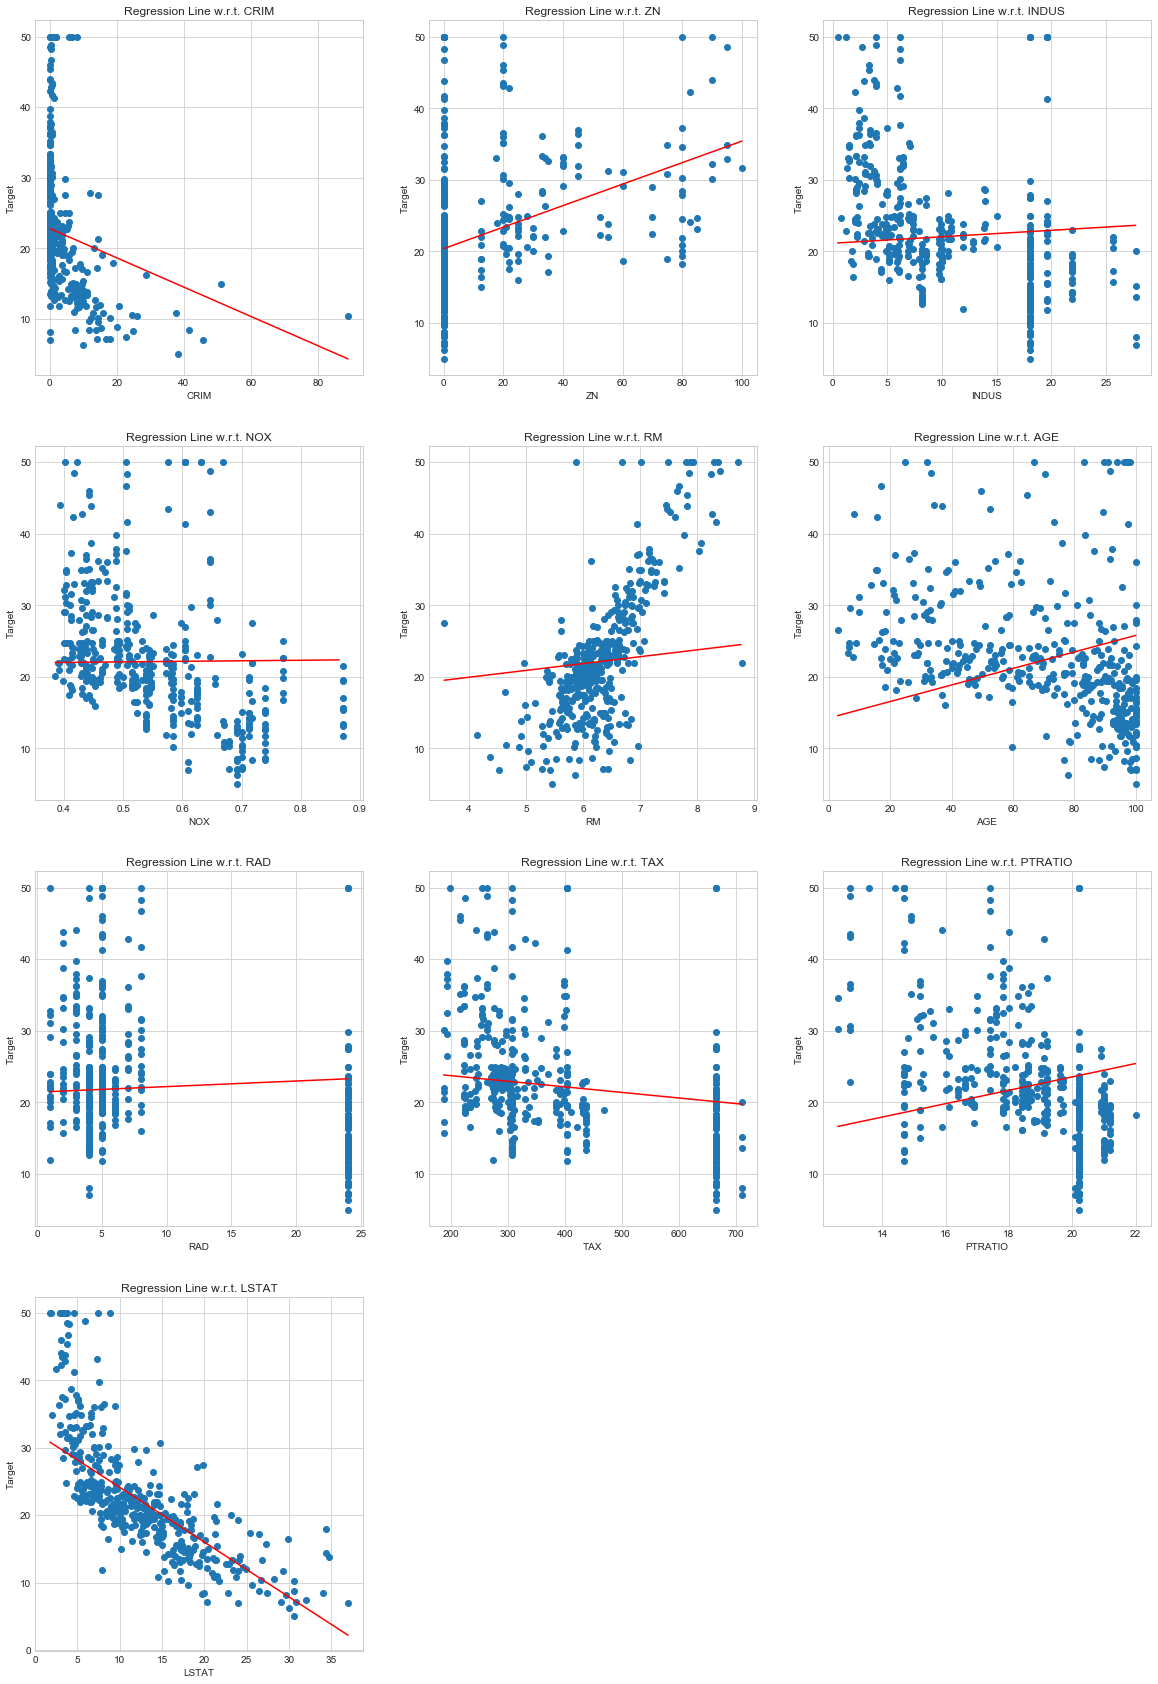

In [14]:
mean_values = np.array(select_x.mean(axis = 0))
mean_values = np.insert(mean_values, 0, 1)
fig = plt.figure(figsize = (20, 30))

for i in range(1, x_values.shape[1]):
    m = max(x_values[:, i])
    n = min(x_values[:, i])

    feature_values_for_plot = np.arange(n, m, 0.01)

    plot_x = np.ones((len(feature_values_for_plot), x_values.shape[1]))
    plot_x = np.multiply(plot_x, mean_values)

    plot_x[:, i] = feature_values_for_plot
    
    p = np.matmul(plot_x, weights_2)

    plt.subplot((x_values.shape[1] // 3) + 1, 3, i)
    plt.scatter(x_values[:, i], y_values)
    plt.plot(plot_x[:, i], p, c = 'r')
    plt.title("Regression Line w.r.t. {}".format(x.feature_names[selected_feature_index[i - 1]]))
    plt.ylabel("Target")
    plt.xlabel("{}".format(x.feature_names[selected_feature_index[i - 1]]))

### Testing
Now let's see does reducing the number of feature made an improvment or not.

In [15]:
test_split_1 = selected_features.iloc[train_test_dict[1]['split_1'][1], :]

select_test_x = test_split_1.iloc[:, :-1]

x_test_values = np.ones((len(select_test_x), select_test_x.shape[1] + 1))
x_test_values[:, 1:] = select_test_x.values
y_test_values = test_split_1.iloc[:, -1].values
y_test_values = y_test_values.reshape(-1, 1)

pred = np.matmul(x_test_values, weights_2)

m2 = mean_squared_error(y_test_values, pred)
print("MSE on Test Set: {:.5f}".format(m2))

MSE on Test Set: 56.75517


Well, that didn't work as expected but the training was faster than using all the features. In large datasets, reducing features based on pearson correlation will result in a huge performance boost in terms on training time and resources.

Let's think what went wrong,
- maybe we threw away an important feature.
- may be the data is not linear, as Pearson correlation is a linear method.

You are welcome to change the value of correlation filter, which I set to 0.35, and check what changes. For now we are going to change the correlation calculation to introduce some non-linear factors.


## Spearman to the rescue
**Spearman rank correlation** is a non-parametric test that is used to measure the degree of association between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.
The formula is,


$$
\rho = 1 - \frac {6 \sum {d_i}^2} {n (n^2 - 1)}
$$

where,
- $\rho$ : Spearman rank correlation
- $d_i$ : the difference between the ranks of corresponding variables
- $n$ : number of observations

Again, we don't have to write the code for spearman correlation, we just need to set the parameter called `method` of the `corr()` function to `spearman` and pandas will do it for us.

<BarContainer object of 13 artists>

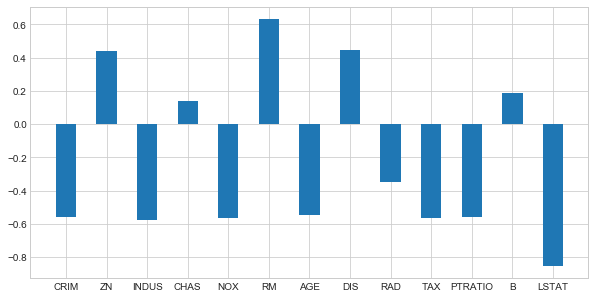

In [16]:
fig = plt.figure(figsize=(10, 5))
col_names = df_boston.corr(method = 'spearman').iloc[-1, :-1].index
values = df_boston.corr(method = 'spearman').iloc[-1, :-1].values
plt.bar(col_names, values, width=0.5)

### Selecting Features
Now, we are going to use features which are more related to target according to our new correlation metric. We select those which have a correlation of more than 0.40.

In [17]:
corr = df_boston.corr(method = 'spearman').target.values

selected_feature_index = np.where(np.abs(corr) > 0.4)[0]
selected_features = df_boston.iloc[:, selected_feature_index]

selected_features.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO  LSTAT  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8   4.03   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7   2.94   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7   5.33   

   target  
0    24.0  
1    21.6  
2    34.7  
3    33.4  
4    36.2

### Load Data in variables
Now that we have our selected features, let's load them up and get to training.

In [18]:
train_split_2 = selected_features.iloc[train_test_dict[2]['split_2'][0], :]

select_x = train_split_2.iloc[:, :-1]

x_values = np.ones((len(select_x), select_x.shape[1] + 1))
x_values[:, 1:] = select_x.values

y_values = train_split_2.iloc[:, -1].values
y_values = y_values.reshape(-1, 1)

# Initializing weights to random values
weights_3 = np.random.rand(select_x.shape[1] + 1, 1)

# Initialize Hyper parameters
learning_rate = 8e-06
epoch = 10000

### Training
Let's start training.

In [19]:
cost = []

# Running Gredient Decent
for i in range(1, epoch+1):
    pred = np.matmul(x_values, weights_3) #<- Generate Prediction
    c = mean_squared_error(y_values, pred) #<- Calculate Error
    cost.append(c)
    weights_3 = gredient_decent(weights_3, x_values, y_values, pred, learning_rate) #<- Update weights

### Visualizing results
Visualizing as before.

#### Cost Function

In [20]:
fig = plt.figure(figsize=(5, 5))
plt.plot(list(range(len(cost) - 100)), cost[100:])
plt.title("Mean Squared Error Graph\nFinal Cost {:.5f}".format(cost[-1]))
plt.ylabel("Cost")
plt.xlabel("Iterations")

Text(0.5, 0, 'Iterations')

#### Regression Line

In [21]:
mean_values = np.array(select_x.mean(axis = 0))
mean_values = np.insert(mean_values, 0, 1)
fig = plt.figure(figsize = (20, 30))

for i in range(1, x_values.shape[1]):
    m = max(x_values[:, i])
    n = min(x_values[:, i])

    feature_values_for_plot = np.arange(n, m, 0.01)

    plot_x = np.ones((len(feature_values_for_plot), x_values.shape[1]))
    plot_x = np.multiply(plot_x, mean_values)

    plot_x[:, i] = feature_values_for_plot
    
    p = np.matmul(plot_x, weights_3)

    plt.subplot((x_values.shape[1] // 3) + 1, 3, i)
    plt.scatter(x_values[:, i], y_values)
    plt.plot(plot_x[:, i], p, c = 'r')
    plt.title("Regression Line w.r.t. {}".format(x.feature_names[selected_feature_index[i - 1]]))
    plt.ylabel("Target")
    plt.xlabel("{}".format(x.feature_names[selected_feature_index[i - 1]]))

### Testing
The moment of truth.

In [22]:
test_split_2 = selected_features.iloc[train_test_dict[2]['split_2'][1], :]

select_test_x = test_split_2.iloc[:, :-1]

x_test_values = np.ones((len(select_test_x), select_test_x.shape[1] + 1))
x_test_values[:, 1:] = select_test_x.values
y_test_values = test_split_2.iloc[:, -1].values
y_test_values = y_test_values.reshape(-1, 1)

pred = np.matmul(x_test_values, weights_3)

m3 = mean_squared_error(y_test_values, pred)
print("MSE on Test Set: {:.5f}".format(m3))

MSE on Test Set: 34.24572


As you can see we get better results than Pearson correlation but we are still not any good as compared to using all the features. You are welcome to tweak tha parameters of each split to check if this changes.


## Final Results
So the Summing everything up, we get the following final result. Now you can use any of the above method to select a beautifull house for yourself in Boston.

In [23]:
print("{:40} {:30}\n".format("Features Used", "Mean Squared Error"))
print("{:40} {:.5f}\n".format("All Features", m1))
print("{:40} {:.5f}\n".format("Features given by Pearson Correlation", m2))
print("{:40} {:.5f}".format("Features given by Spearman Correlation", m3))

Features Used                            Mean Squared Error            

All Features                             31.18525

Features given by Pearson Correlation    56.75517

Features given by Spearman Correlation   34.24572


## References
- **Correlation methods** : https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
- **Feature Selection** : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- **KFold Cross Validation** : https://machinelearningmastery.com/k-fold-cross-validation/